# MNIST Dataset digit recognition

Dataset: https://en.wikipedia.org/wiki/MNIST_database

Based off: https://medium.com/geekculture/deep-learning-a-to-z-part-2-mnist-the-hello-world-of-neural-networks-2429c4367086

In [1]:
# Install packages
%pip install pandas -q
%pip install matplotlib -q
%pip install tensorflow -q

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import tensorflow as tf

2025-06-04 15:32:47.282117: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
mnist = tf.keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

# Scale the values to range [0, 1]
X_train_full = X_train_full/255.
X_test = X_test/255.

# Create the validation data from training data.
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

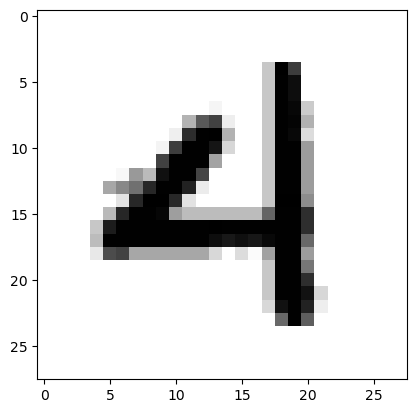

In [4]:
# Show a random image
plt.imshow(X_train[np.random.randint(0, len(X_train))], cmap='binary')

In [5]:
LAYERS = [
    tf.keras.layers.Flatten(input_shape=[28,28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
]
model = tf.keras.models.Sequential(LAYERS)

In [6]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="SGD",
             metrics=["accuracy"])

In [7]:
EPOCHS = 30
VALIDATION_SET = (X_valid, y_valid)
history = model.fit(X_train, y_train, epochs=EPOCHS,
                   validation_data=VALIDATION_SET)

Epoch 1/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.6176 - accuracy: 0.8421 - val_loss: 0.3084 - val_accuracy: 0.9180
Epoch 2/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.2902 - accuracy: 0.9165 - val_loss: 0.2393 - val_accuracy: 0.9342
Epoch 3/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2377 - accuracy: 0.9321 - val_loss: 0.2087 - val_accuracy: 0.9426
Epoch 4/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2038 - accuracy: 0.9416 - val_loss: 0.1793 - val_accuracy: 0.9492
Epoch 5/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.1778 - accuracy: 0.9492 - val_loss: 0.1638 - val_accuracy: 0.9568
Epoch 6/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.1578 - accuracy: 0.9548 - val_loss: 0.1468 - val_accuracy: 0.9608
Epoch 7/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.1408 - accuracy: 0.9600 - val_loss: 0.1330 - val_accuracy:

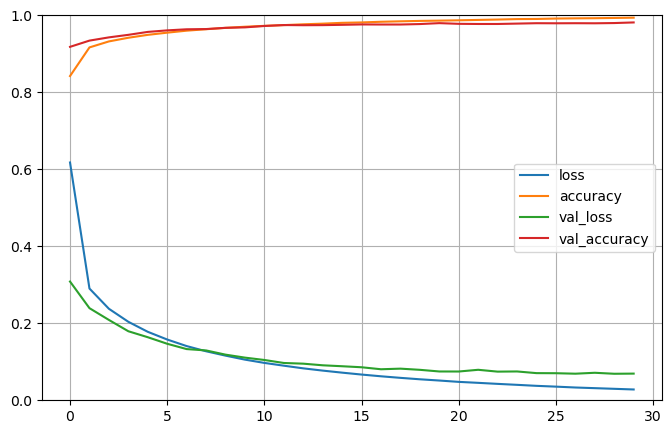

In [8]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [9]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy * 100:.2f}%")

313/313 [==============================] - 1s 4ms/step - loss: 0.0747 - accuracy: 0.9769
Test Loss: 0.0747
Test Accuracy: 97.69%


1/1 [==============================] - 0s 87ms/step


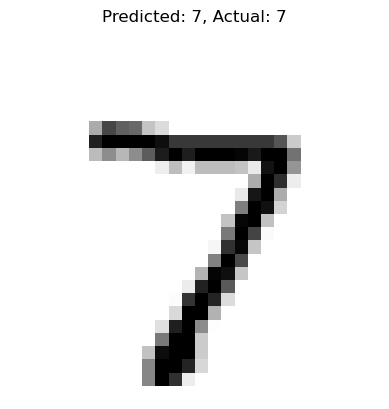

------------------------------------------------------------


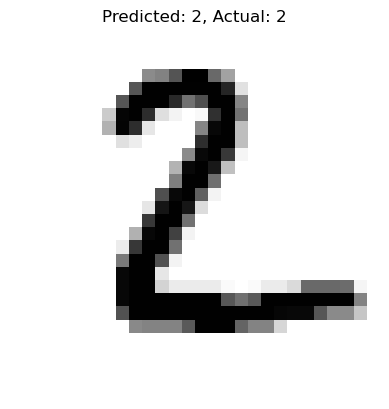

------------------------------------------------------------


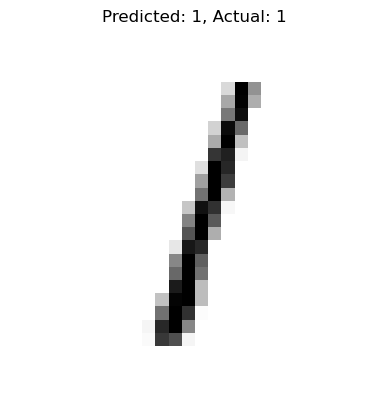

------------------------------------------------------------


In [10]:
X_new = X_test[:3]
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_test_new = y_test[:3]
for data, pred, actual in zip(X_new, y_pred, y_test_new):
    plt.imshow(data, cmap="binary")
    plt.title(f"Predicted: {pred}, Actual: {actual}")
    plt.axis('off')
    plt.show()
    print("---"*20)